In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd 
URL = 'https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'
def get_data(filename ='Fremont.csv', url = URL, force_download= False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data= pd.read_csv('Fremont.csv',index_col='Date', parse_dates =True)
    data.columns = ['West' , 'East']
    data['Total'] = data['West'] + data['East']
    return data

In [3]:
data = get_data()
data.head()

,West,East,Total
Date,,,
2014-12-01,23689,24818,48507
2012-11-01,26062,24585,50647
2012-12-01,18608,17761,36369
2015-01-01,35754,24876,60630
2017-12-01,18946,26916,45862


In [4]:
#from urllib.request import urlretrieve
#urlretrieve(URL,'Fremont.csv')

In [5]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv')
#data.head()

In [6]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv', index_col= 'Date', parse_dates = True)


In [7]:
#data.describe()

In [8]:
#data.count()

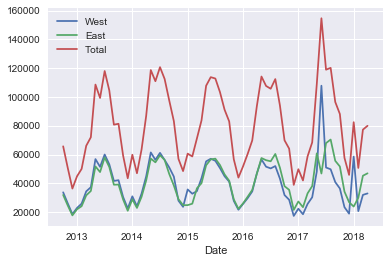

In [9]:

data.resample('M').sum().plot()

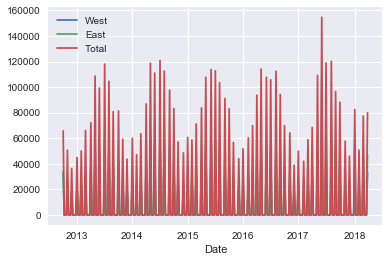

In [10]:

data.resample('W').sum().plot()
#data.plot()

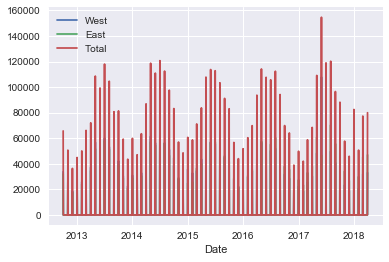

In [11]:
data.resample('D').sum().plot()

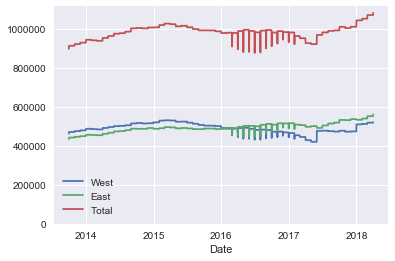

In [12]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [13]:
#data.groupby(data.index.time).mean().plot()

In [14]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027


In [15]:
#pivoted.plot(legend = False)